# Term Project

## Members
- Dherya Jain
- Lidia Rodionova
- Joubin Najmaie


## Project Objective
To predict the overall building evaluation score based on characteristics such as building age, ward, and property type features, in order to proactively identify buildings at risk of poor compliance or requiring inspection.

## High Level Steps
- Hypothesis Test 1 - YEAR BUILT vs. Building Score
- Hypothesis Test 2 - WARD vs. Building Score
- Hypothesis Test 3 - PROPERTY TYPE vs. Building Score

## Dataset
City of Toronto - Apartment Building Evaluation
https://open.toronto.ca/dataset/apartment-building-evaluation/

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
import matplotlib.pyplot as plt

def plotDist(df, title, xlabel, ylabel):
    # Plot the distribution
    plt.figure(figsize=(7, 4))
    plt.hist(df, bins=30, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [254]:
# upload data into DataFrame
apartmentEvalDf = pd.read_csv("Apartment Building Evaluations 2023 - current.csv", encoding='latin-1')
apartmentEvalDf.head(2)

,_id,RSN,YEAR REGISTERED,YEAR BUILT,YEAR EVALUATED,PROPERTY TYPE,WARD,WARDNAME,SITE ADDRESS,CONFIRMED STOREYS,...,CLEANING LOG,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,TENANT SERVICE REQUEST LOG,GRID,LATITUDE,LONGITUDE,X,Y
0,1,4897867,2021.0,2020.0,2023,PRIVATE,11,University-Rosedale,99 GERRARD ST W,32,...,3,3,3,3,3,S1145,NaN,NaN,313970.923,4835138.057
1,2,4153580,2017.0,1930.0,2023,PRIVATE,13,Toronto Centre,26 GIFFORD ST,4,...,3,3,3,3,3,S1327,43.663338,-79.363691,315777.607,4835719.536


In [255]:
apartmentEvalDf.describe()

,_id,RSN,YEAR REGISTERED,YEAR BUILT,YEAR EVALUATED,WARD,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,PROACTIVE BUILDING SCORE,...,MAINTENANCE LOG,CLEANING LOG,VITAL SERVICE PLAN,ELECTRICAL SAFETY PLAN,STATE OF GOOD REPAIR PLAN,TENANT SERVICE REQUEST LOG,LATITUDE,LONGITUDE,X,Y
count,3573.000000,3.573000e+03,3516.000000,3556.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,...,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3573.000000,3471.000000,3471.000000,3536.000000,3.536000e+03
mean,1787.000000,4.219461e+06,2017.447383,1962.163105,2023.507976,11.122866,7.774699,89.815001,87.177470,87.315169,...,2.587462,2.447243,2.537643,2.276518,2.522530,2.642877,43.699539,-79.404815,312437.482146,4.839703e+06
std,1031.580583,2.379785e+05,1.406272,20.196624,0.500006,6.306360,6.491221,97.334050,8.769671,8.675852,...,0.838919,0.909282,0.886976,0.988285,0.890323,0.791951,0.044210,0.087197,7019.079043,4.898066e+03
min,1.000000,4.152554e+06,2017.000000,1805.000000,2023.000000,1.000000,3.000000,10.000000,17.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.588268,-79.614871,295530.634000,4.827372e+06
25%,894.000000,4.153728e+06,2017.000000,1955.000000,2023.000000,5.000000,3.000000,23.000000,83.000000,83.000000,...,3.000000,2.000000,3.000000,1.000000,3.000000,3.000000,43.668137,-79.476493,306733.366750,4.836226e+06
50%,1787.000000,4.154689e+06,2017.000000,1962.000000,2024.000000,12.000000,4.000000,50.000000,89.000000,89.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,43.698108,-79.411401,311975.988500,4.839558e+06
75%,2680.000000,4.155706e+06,2017.000000,1970.000000,2024.000000,16.000000,10.000000,125.000000,93.000000,93.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,43.730877,-79.343561,317299.369000,4.843192e+06
max,3573.000000,5.415712e+06,2024.000000,2023.000000,2024.000000,25.000000,51.000000,793.000000,100.000000,100.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,43.813943,-79.149243,332968.256000,4.852475e+06


Drop columns that will not be used for modeling

In [256]:
colsToDrop = [
    '_id',
    'RSN',
    'GRID',
    'LATITUDE','TENANT NOTIFICATION BOARD',
    'PEST CONTROL LOG', 'MAINTENANCE LOG', 'CLEANING LOG',
    'TENANT SERVICE REQUEST LOG', 'LONGITUDE', 'X', 'Y','YEAR REGISTERED','YEAR EVALUATED',
    # 'WARD',
    'SITE ADDRESS','EVALUATION COMPLETED ON',
    'PROACTIVE BUILDING SCORE','CURRENT REACTIVE SCORE','NO OF AREAS EVALUATED','NUMBERING OF PROPERTY','EXTERIOR GROUNDS',
    'FENCING','RETAINING WALLS','CATCH BASINS / STORM DRAINAGE','BUILDING EXTERIOR','BALCONY GUARDS','WINDOWS',
    'EXT. RECEPTACLE STORAGE AREA','EXTERIOR WALKWAYS','CLOTHING DROP BOXES','ACCESSORY BUILDINGS','INTERCOM',
    'EMERGENCY CONTACT SIGN','LOBBY - WALLS AND CEILING','LOBBY FLOORS','LAUNDRY ROOM','INT. RECEPTACLE STORAGE AREA',
    'MAIL RECEPTACLES','EXTERIOR DOORS','STORAGE AREAS/LOCKERS MAINT.','POOLS','OTHER AMENITIES',
    'PARKING AREAS','ABANDONED EQUIP./DERELICT VEH.','GARBAGE/COMPACTOR ROOM','ELEVATOR MAINTENANCE','ELEVATOR COSMETICS',
    'INT. HALLWAY - WALLS / CEILING','INTERIOR HALLWAY FLOORS','INT. LOBBY / HALLWAY LIGHTING','COMMON AREA VENTILATION','ELECTRICAL SERVICES / OUTLETS',
    'CHUTE ROOMS - MAINTENANCE','STAIRWELL - WALLS AND CEILING','STAIRWELL - LANDING AND STEPS','STAIRWELL LIGHTING','INT. HANDRAIL / GUARD - SAFETY',
    'INT. HANDRAIL / GUARD - MAINT.','GRAFFITI','BUILDING CLEANLINESS','COMMON AREA PESTS','VITAL SERVICE PLAN',
    'ELECTRICAL SAFETY PLAN','STATE OF GOOD REPAIR PLAN'
    ]

apartmentEvalDf.drop(colsToDrop, axis=1, errors='ignore', inplace=True)

In [257]:
apartmentEvalDf.columns

Index(['YEAR BUILT', 'PROPERTY TYPE', 'WARD', 'WARDNAME', 'CONFIRMED STOREYS',
       'CONFIRMED UNITS', 'CURRENT BUILDING EVAL SCORE'],
      dtype='object')

In [258]:
from datetime import datetime
current_year = datetime.now().year

# Add a new column called 'BUILDING AGE' (current year - year column)
apartmentEvalDf['BUILDING AGE'] = current_year - apartmentEvalDf['YEAR BUILT']
apartmentEvalDf.drop('YEAR BUILT', axis=1, errors='ignore', inplace=True)

In [259]:
apartmentEvalDf.head(5)

,PROPERTY TYPE,WARD,WARDNAME,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,BUILDING AGE
0,PRIVATE,11,University-Rosedale,32,275,98.0,5.0
1,PRIVATE,13,Toronto Centre,4,15,93.0,95.0
2,PRIVATE,9,Davenport,3,29,75.0,65.0
3,PRIVATE,9,Davenport,3,23,80.0,65.0
4,PRIVATE,21,Scarborough Centre,14,192,89.0,71.0


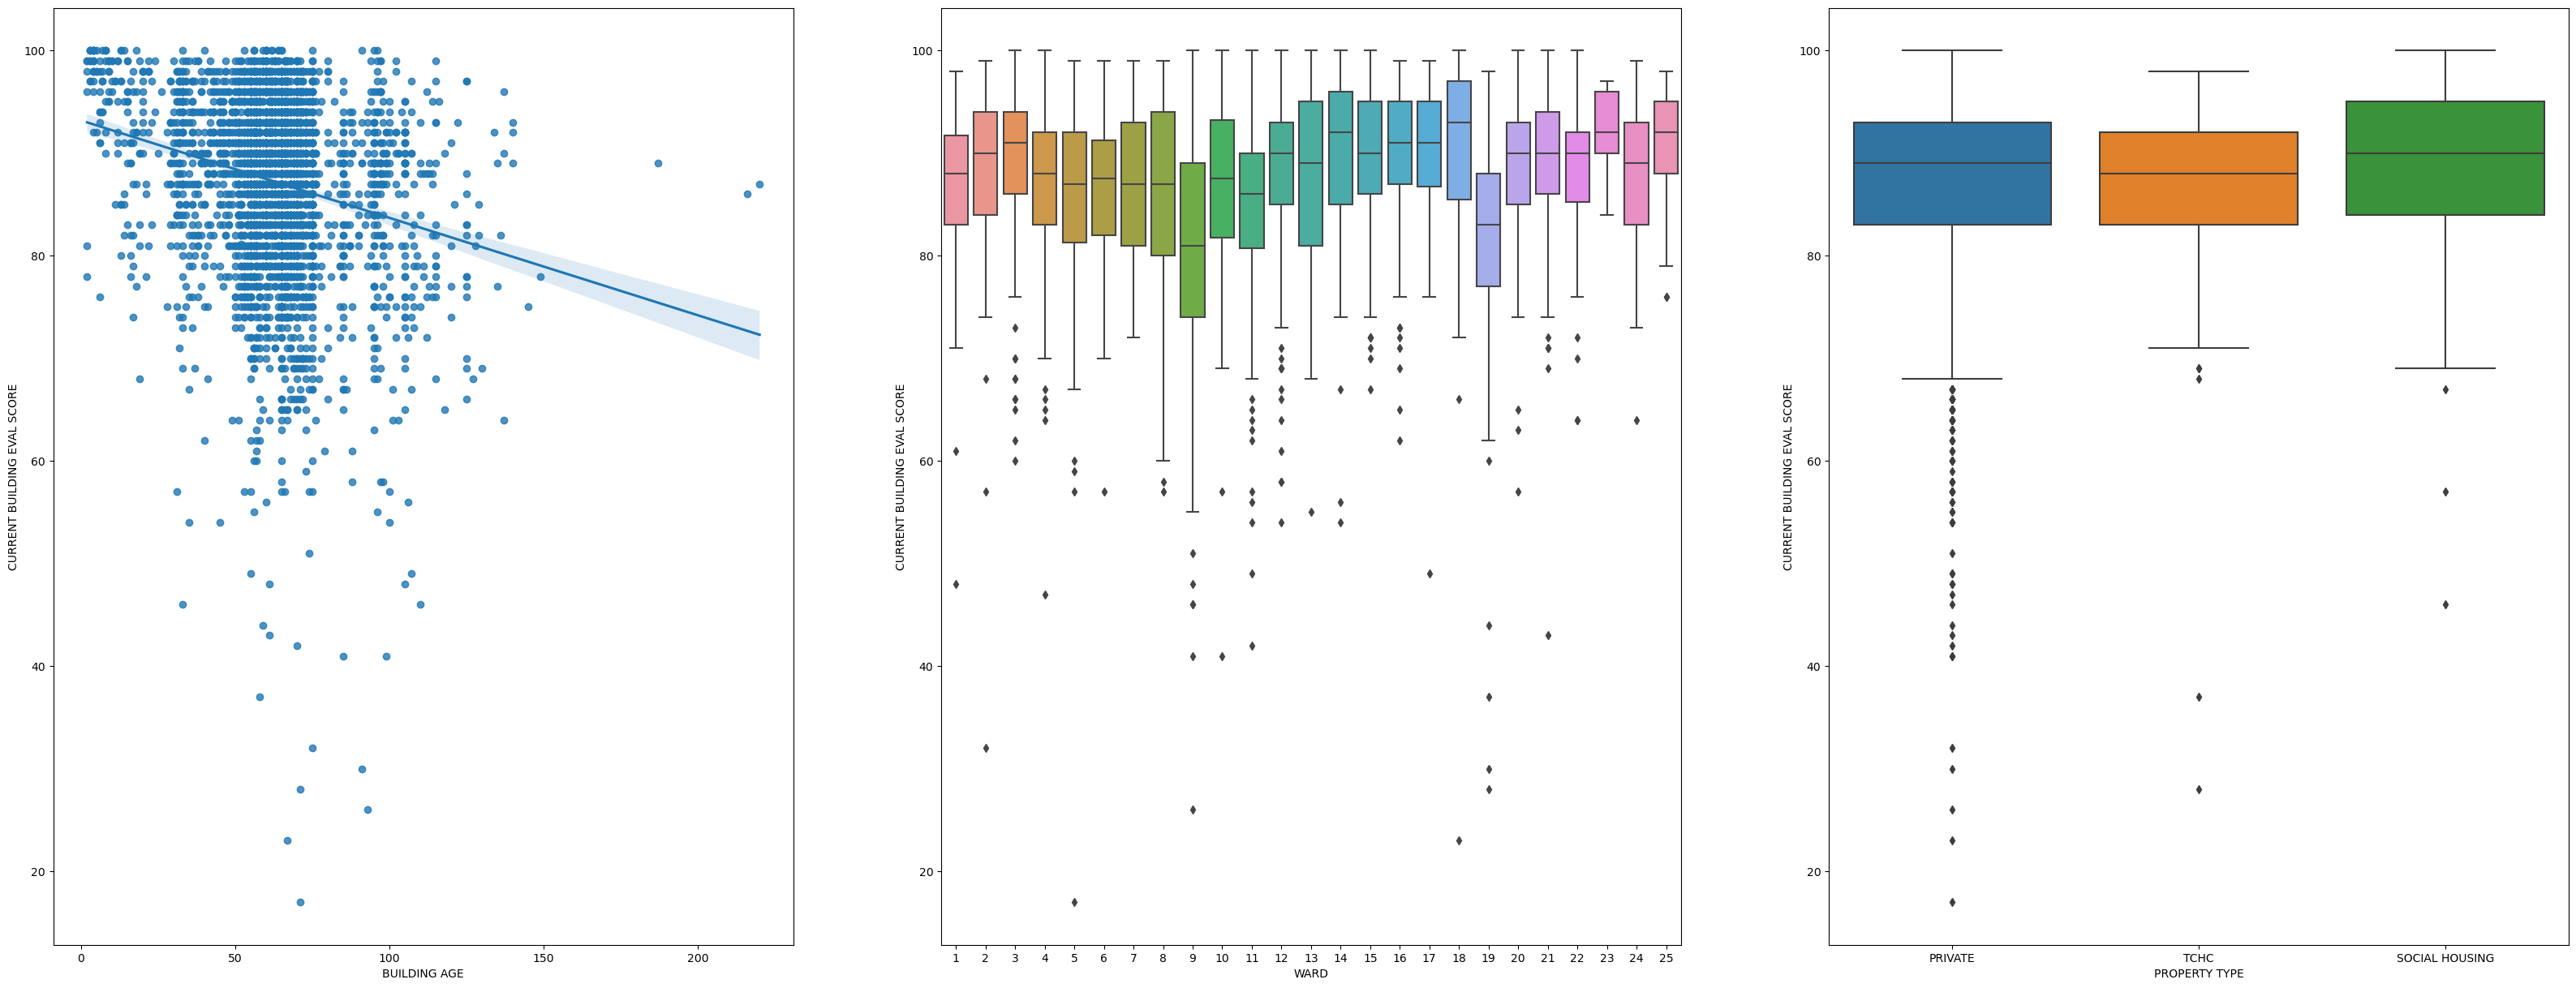

In [260]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_figwidth(40)
fig.set_figheight(15)

ax1 = sns.regplot(x=apartmentEvalDf['BUILDING AGE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax1)
ax2 = sns.boxplot(x=apartmentEvalDf['WARD'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax2)
ax3 = sns.boxplot(x=apartmentEvalDf['PROPERTY TYPE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'], ax=ax3)

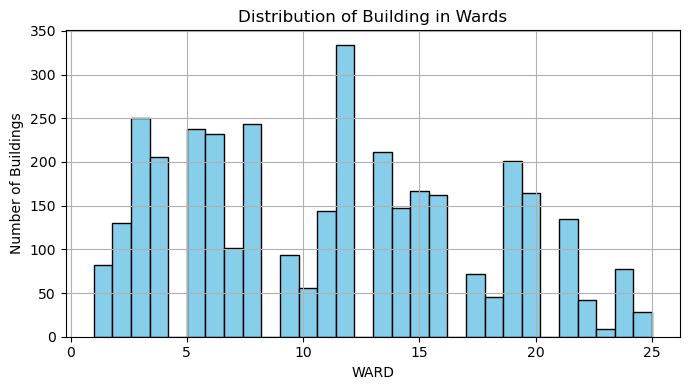

In [261]:
plotDist(apartmentEvalDf['WARD'].dropna(), 'Distribution of Building in Wards', 'WARD', 'Number of Buildings')

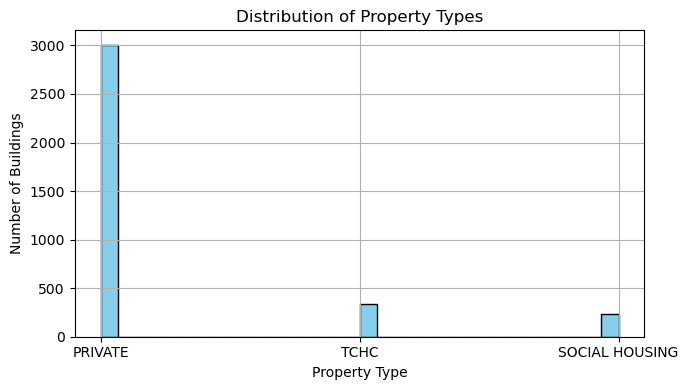

In [262]:
plotDist(apartmentEvalDf['PROPERTY TYPE'].dropna(), 'Distribution of Property Types', 'Property Type', 'Number of Buildings')

In [263]:
# Calculate the mean of YEAR BUILT and CURRENT BUILDING EVAL SCORE,
# dropping rows where either value is missing
mean_values = apartmentEvalDf[['BUILDING AGE', 'CURRENT BUILDING EVAL SCORE']].dropna().mean()
mean_values

BUILDING AGE                   62.836895
CURRENT BUILDING EVAL SCORE    87.218251
dtype: float64

In [264]:
stddev_values = apartmentEvalDf[['BUILDING AGE', 'CURRENT BUILDING EVAL SCORE']].dropna().std()
stddev_values

BUILDING AGE                   20.196624
CURRENT BUILDING EVAL SCORE     8.736644
dtype: float64

# Hypothesis Test 1 - YEAR BUILT vs. Building Score

Test whether older or newer buildings have different average evaluation scores.

Goal: Test whether older or newer buildings have different average evaluation scores.

- H0: There is no relationship between year built and building score.
- H1: There is a statistically significant relationship between year built and building score.


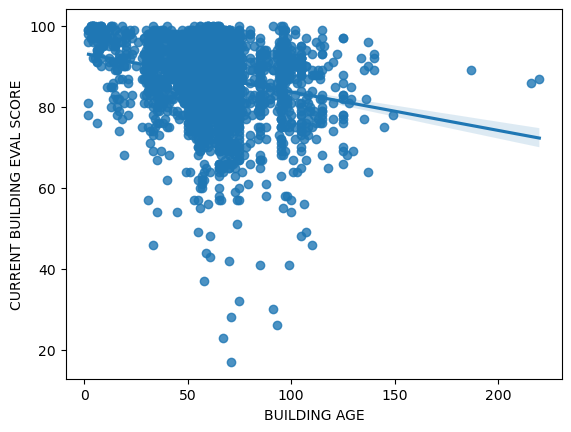

In [265]:
sns.regplot(x=apartmentEvalDf['BUILDING AGE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'])
plt.show()

Assuming that the null-hypothesis is true, calculate the the correlation and the p-value as indicators of:
- The probability of getting extreme values as the ones observed
- The strength of the relationship between building age and score

In [266]:
from scipy.stats import pearsonr

valid_data = apartmentEvalDf[['BUILDING AGE', 'CURRENT BUILDING EVAL SCORE']].dropna()
corr, p_value = pearsonr(valid_data['BUILDING AGE'], valid_data['CURRENT BUILDING EVAL SCORE'])
print(f"Correlation: {corr:.3f}")
print(f"p-value: {p_value:.3g}")


Correlation: -0.219
p-value: 4.83e-40


## Conclusion

The observed data is unlikely under H0​, therefore reject the null hypothesis i.e. there is significant statistical importance between the building age and building score.

It suggests: "On average, older buildings score slightly lower, but the pattern isn't very strong."

# Hypothesis Test 2 - WARD vs. Building Score

Test whether buildings in different wards have different average scores.

Goal: Test whether buildings in different wards have different average scores.

- H0: The average building score is the same across all wards.
- H1: At least one ward has a different average building score.

# Hypothesis Test 3 - PROPERTY TYPE vs. Building Score

Determine if the average building score differs by property type (e.g. PRIVATE, TCHC, etc.) or different property types have significantly different mean scores

Goal: Determine if the average building score differs by property type (e.g. PRIVATE, TCHC, etc.)

- H0: The mean building score is the same across all property types.
- H1: At least one property type has a different mean building score.

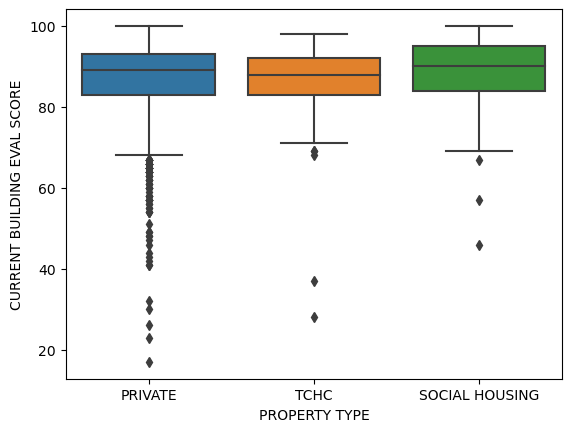

In [267]:
sns.boxplot(x=apartmentEvalDf['PROPERTY TYPE'], y=apartmentEvalDf['CURRENT BUILDING EVAL SCORE'])
plt.show()

## Used Analysis: ANOVA (Analysis Of Variance)

In [268]:
from scipy.stats import f_oneway

filtered_df = apartmentEvalDf[['PROPERTY TYPE', 'CURRENT BUILDING EVAL SCORE']].dropna()

# Group scores by property type
grouped_scores = filtered_df.groupby('PROPERTY TYPE')['CURRENT BUILDING EVAL SCORE'].apply(list)

# Perform ANOVA
anova_result = f_oneway(*grouped_scores)

print(f"F-statistics: {anova_result.statistic:.3f}")
print(f"p-value: {anova_result.pvalue:.4f}")

F-statistics: 4.878
p-value: 0.0077


## Conclusion

The f-statistics is much larger than 1 in addition to the low p-value, which indicates that we can reject H0: The mean building score is the same across all property types.

In [293]:
apartmentEvalDf

,CONFIRMED STOREYS,CONFIRMED UNITS,CURRENT BUILDING EVAL SCORE,BUILDING AGE
0,32,275,98.0,5.0
1,4,15,93.0,95.0
2,3,29,75.0,65.0
3,3,23,80.0,65.0
4,14,192,89.0,71.0
...,...,...,...,...
3568,4,38,88.0,48.0
3569,5,97,81.0,38.0
3570,7,64,95.0,9.0
3571,6,59,68.0,55.0


## Linear Regression

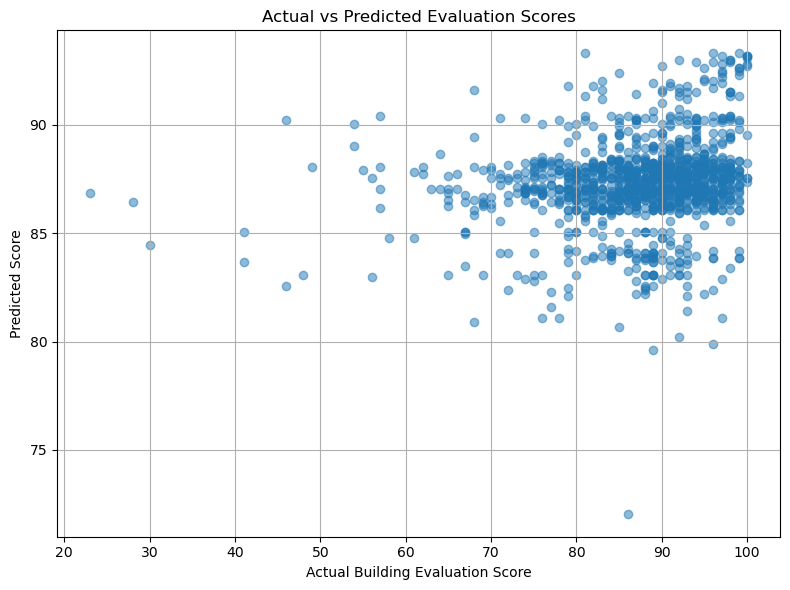

(0.03684143380222604, 9.033235168046728)

In [294]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

apartmentEvalDf.drop('WARD', axis=1, errors='ignore', inplace=True)
apartmentEvalDf.drop('WARDNAME', axis=1, errors='ignore', inplace=True)
apartmentEvalDf.drop('PROPERTY TYPE', axis=1, errors='ignore', inplace=True)
apartmentEvalDf.drop('CONFIRMED STOREYS', axis=1, errors='ignore', inplace=True)
apartmentEvalDf.drop('CONFIRMED UNITS', axis=1, errors='ignore', inplace=True)

# ward_dummies = pd.get_dummies(apartmentEvalDf['WARDNAME'], drop_first=True)
# df_encoded = pd.concat([apartmentEvalDf.drop('WARDNAME', axis=1), ward_dummies], axis=1)

# propType_dummies = pd.get_dummies(df_encoded['PROPERTY TYPE'], drop_first=True)
# df_encoded = pd.concat([df_encoded.drop('PROPERTY TYPE', axis=1), propType_dummies], axis=1)

# Features and target
X = apartmentEvalDf.drop('CURRENT BUILDING EVAL SCORE', axis=1)
y = apartmentEvalDf['CURRENT BUILDING EVAL SCORE']

X = X.dropna()
y = y.loc[X.index]  # Keep y aligned with X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Building Evaluation Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs Predicted Evaluation Scores')
plt.grid(True)
plt.tight_layout()
plt.show()

(r2, rmse)